# Ship Performance Analyze and Segmentation

Overview Data

Sumber data  : https://www.kaggle.com/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset

About Dataset
The Ship Performance Dataset is a synthetic yet realistic collection of data designed to represent key operational metrics and attributes of various ship types in the Gulf of Guinea. This dataset is tailored for maritime data analytics enthusiasts, machine learning practitioners, and professionals interested in exploring clustering, prediction, and optimization problems in the maritime industry.

Motivation
The maritime sector is one of the most critical components of global trade, contributing significantly to economic growth and sustainability. Understanding ship performance, fuel efficiency, and operational cost factors are essential for improving decision-making and minimizing environmental impact.

This dataset aims to provide a platform for exploring ship performance trends, identifying patterns, and solving real-world maritime challenges through data-driven approaches.

Dataset Features
The dataset consists of 2736 rows and 24 columns, with features categorized into numerical and categorical types. Below are some key highlights:

Numerical Features

- Speed_Over_Ground_knots: Average speed of the ship over water (in knots).
- Engine_Power_kW: Engine power output (in kilowatts).
- Distance_Traveled_nm: Total distance traveled by the ship (in nautical miles).
- Operational_Cost_USD: Total operational cost per voyage (in USD).
- Revenue_per_Voyage_USD: Revenue generated per voyage (in USD).
- Efficiency_nm_per_kWh: Energy efficiency calculated in nautical miles per kilowatt-hour.
  
Categorical Features

- Ship_Type: Type of ship (e.g., Tanker, Container Ship, Fish Carrier, Bulk Carrier).
- Route_Type: Shipping route type (e.g., Short-haul, Long-haul, Transoceanic).
- Engine_Type: Type of engine (e.g., Diesel, Heavy Fuel Oil).
- Maintenance_Status: Maintenance condition of the ship (e.g., Fair, Critical, Good).
- Weather_Condition: Prevailing weather conditions during voyages (e.g., Calm, Moderate, Rough).

Potential Use Cases

- Exploratory Data Analysis (EDA): Identify trends and patterns in ship performance and operational efficiency.
- Clustering Analysis: Segment ships based on performance metrics and categorical attributes.
- Optimization: Analyze trade-offs between operational costs and revenue to improve profitability.

Acknowledgment

This dataset was synthetically generated and curated to resemble real-world ship performance data. While it reflects realistic maritime scenarios, it is not sourced from actual shipping companies or vessels.

License
This dataset is shared under the CC BY 4.0 License, allowing for reuse and adaptation with proper attribution.

## Data Wrangling

In [1]:
import pandas as pd
from scipy.stats import mode

In [2]:
df = pd.read_csv('Ship_Performance_Dataset.csv')
df.head()

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,2023-06-04,Container Ship,NaN,Heavy Fuel Oil (HFO),Critical,12.597558,2062.983982,1030.943616,14.132284,Moderate,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,Good,10.387580,1796.057415,1060.486382,14.653083,Rough,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,2023-06-18,Container Ship,Long-haul,Diesel,Fair,20.749747,1648.556685,658.874144,7.199261,Moderate,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,Fair,21.055102,915.261795,1126.822519,11.789063,Moderate,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2023-07-02,Fish Carrier,Transoceanic,Diesel,Fair,13.742777,1089.721803,1445.281159,9.727833,Moderate,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     2736 non-null   object 
 1   Ship_Type                2600 non-null   object 
 2   Route_Type               2600 non-null   object 
 3   Engine_Type              2600 non-null   object 
 4   Maintenance_Status       2600 non-null   object 
 5   Speed_Over_Ground_knots  2736 non-null   float64
 6   Engine_Power_kW          2736 non-null   float64
 7   Distance_Traveled_nm     2736 non-null   float64
 8   Draft_meters             2736 non-null   float64
 9   Weather_Condition        2600 non-null   object 
 10  Cargo_Weight_tons        2736 non-null   float64
 11  Operational_Cost_USD     2736 non-null   float64
 12  Revenue_per_Voyage_USD   2736 non-null   float64
 13  Turnaround_Time_hours    2736 non-null   float64
 14  Efficiency_nm_per_kWh   

In [4]:
df.dropna(inplace= True)
df.isna().sum()

Date                       0
Ship_Type                  0
Route_Type                 0
Engine_Type                0
Maintenance_Status         0
Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Weather_Condition          0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Speed_Over_Ground_knots,2127.0,17.606620,4.358035,10.009756,13.901849,17.709557,21.317888,24.991661
Engine_Power_kW,2127.0,1750.937650,714.510707,501.739027,1140.312110,1755.420863,2364.977047,2998.734329
Distance_Traveled_nm,2127.0,1038.979949,566.964336,50.433150,559.500880,1037.646044,1541.193201,1998.337057
Draft_meters,2127.0,9.961135,2.843848,5.001947,7.475897,10.001622,12.393851,14.989905
Cargo_Weight_tons,2127.0,1033.466859,557.643284,50.229624,557.071885,1045.366596,1526.149743,1999.126697
Operational_Cost_USD,2127.0,257042.246655,140640.549548,10097.439656,133864.243330,259124.728516,384452.537643,499734.867868
Revenue_per_Voyage_USD,2127.0,523427.583448,269842.456183,50351.814447,292183.911075,524083.139296,752933.741950,999811.927756
Turnaround_Time_hours,2127.0,41.773758,17.641702,12.019909,26.312659,41.533238,57.558671,71.972415
Efficiency_nm_per_kWh,2127.0,0.789907,0.403117,0.100211,0.455310,0.774962,1.136306,1.498191
Seasonal_Impact_Score,2127.0,1.001564,0.289193,0.500004,0.752892,1.007639,1.250343,1.499224


## Clustering

Preprocessing

In [7]:
df['PWR'] = df['Engine_Power_kW'] / df['Cargo_Weight_tons']
df['PWR'].describe()

count    2127.000000
mean        3.252261
std         5.095453
min         0.269939
25%         1.027512
50%         1.675490
75%         3.178739
max        57.058357
Name: PWR, dtype: float64

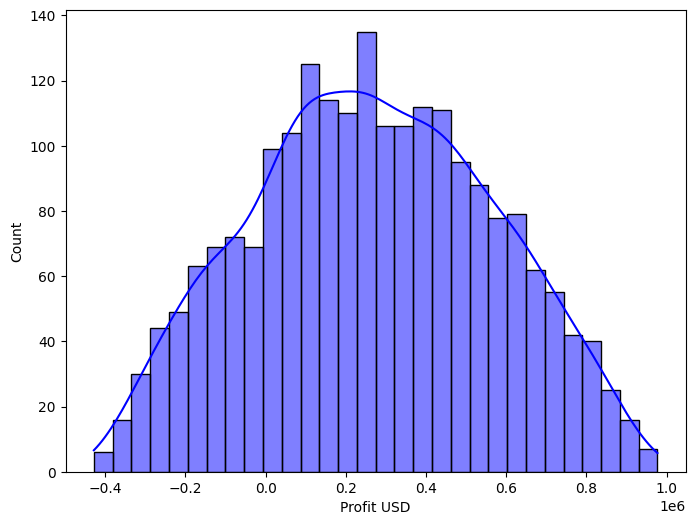

In [8]:
# Profit Coloumn
df['Profit USD'] = df['Revenue_per_Voyage_USD'] - df['Operational_Cost_USD']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.histplot(
    df['Profit USD'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

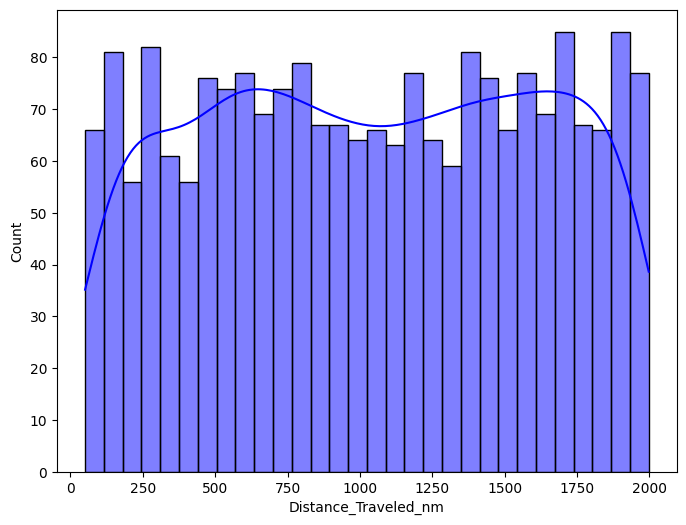

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(
    df['Distance_Traveled_nm'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

In [10]:
def distance_traveled_grouping(nm):
    if nm <= 750:
        return 'Short'
    elif nm <=1500:
        return 'Middle'
    else:
        return 'Long'

df['distance_traveled_grouping'] = df['Distance_Traveled_nm'].apply(distance_traveled_grouping)

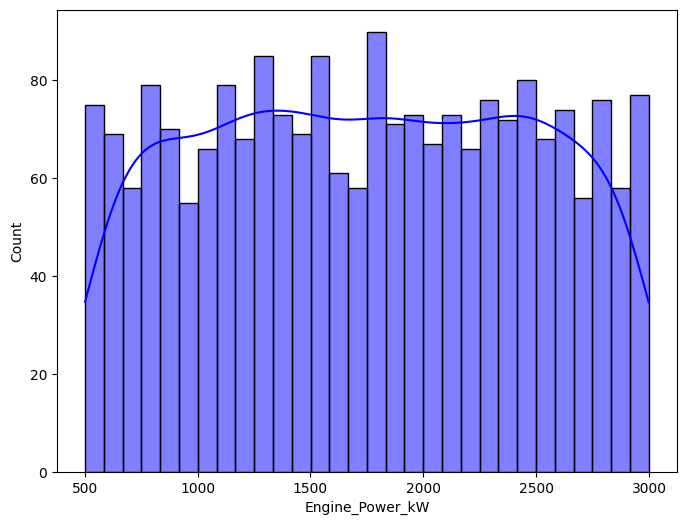

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(
    df['Engine_Power_kW'],
    kde= True,
    bins= 30,
    color= 'blue'
)
plt.show()

In [12]:
def engine_power_grouping(power):
    if power <= 1250:
        return "Low"
    elif power <=2250:
        return "Middle"
    else:
        return "High"

df['engine_power_grouping'] = df['Engine_Power_kW'].apply(engine_power_grouping)

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Ship_Type encoded'] = le.fit_transform(df['Ship_Type'])
df['Route_Type encoded'] = le.fit_transform(df['Route_Type'])
df['Engine_Type encoded'] = le.fit_transform(df['Engine_Type'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2127 entries, 1 to 2735
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        2127 non-null   object 
 1   Ship_Type                   2127 non-null   object 
 2   Route_Type                  2127 non-null   object 
 3   Engine_Type                 2127 non-null   object 
 4   Maintenance_Status          2127 non-null   object 
 5   Speed_Over_Ground_knots     2127 non-null   float64
 6   Engine_Power_kW             2127 non-null   float64
 7   Distance_Traveled_nm        2127 non-null   float64
 8   Draft_meters                2127 non-null   float64
 9   Weather_Condition           2127 non-null   object 
 10  Cargo_Weight_tons           2127 non-null   float64
 11  Operational_Cost_USD        2127 non-null   float64
 12  Revenue_per_Voyage_USD      2127 non-null   float64
 13  Turnaround_Time_hours       2127 non-n

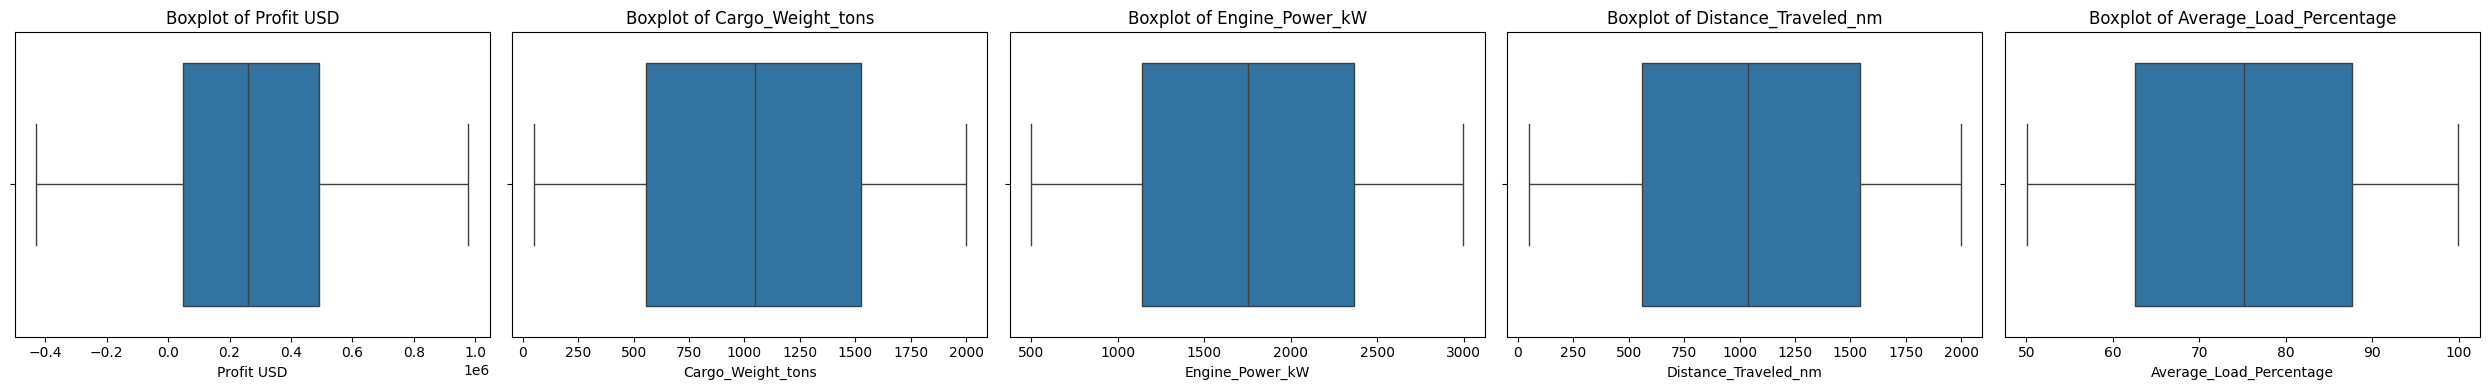

In [14]:
outliers = [
    'Profit USD', 'Cargo_Weight_tons', 'Engine_Power_kW', 'Distance_Traveled_nm',
'Average_Load_Percentage'
]

df_ouliers = df[outliers]
num_col = 5
num_row = -(-len(df_ouliers.columns) // num_col)
plt.figure(figsize=(num_col * 5, num_row * 4))

for i,feature in enumerate(df_ouliers.columns,1):
    plt.subplot(num_row, num_col, i)
    sns.boxplot(x= df_ouliers[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

Segementation for Route Optimizer

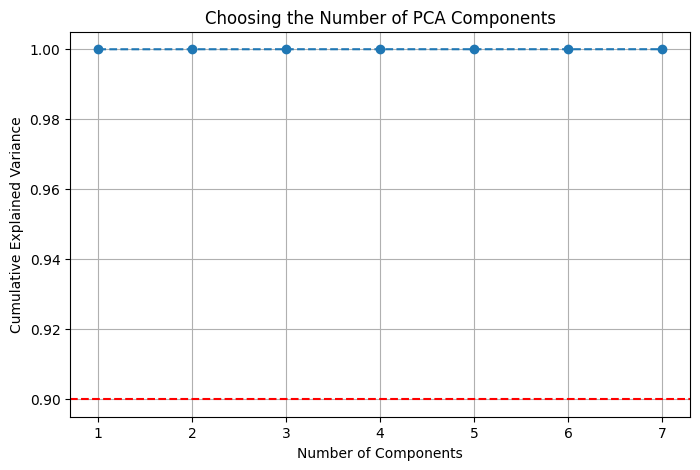

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler = StandardScaler()
pca = PCA()


route_number_col = [
'Profit USD', 'Cargo_Weight_tons', 'Engine_Power_kW', 'Distance_Traveled_nm',
'Average_Load_Percentage'
]
route_kategori_col = [
        'Route_Type encoded', 'Engine_Type encoded', 
]

pca.fit_transform(df[route_kategori_col + route_number_col])

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Number of PCA Components')
plt.axhline(y=0.90, color='r', linestyle='--')  
plt.grid(True)
plt.show()

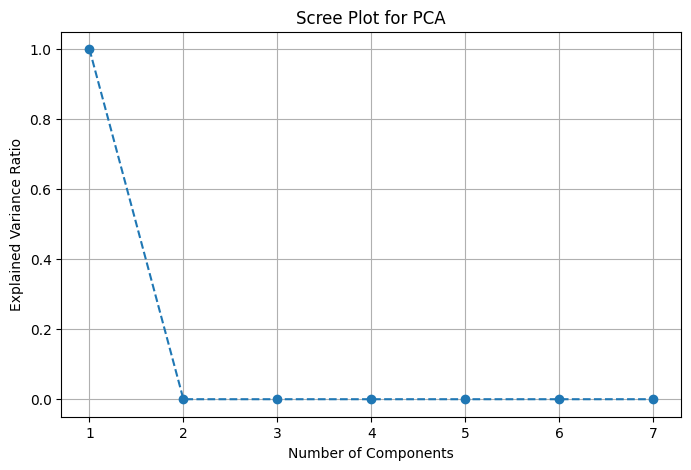

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

In [17]:
pca = PCA(n_components=2)
x = pca.fit_transform(df[route_kategori_col + route_number_col])


c:\Users\ASUS TUF F15\py11\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ASUS TUF F15\py11\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ASUS TUF F15\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS TUF F15\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ASUS TUF F15\AppData\Local\

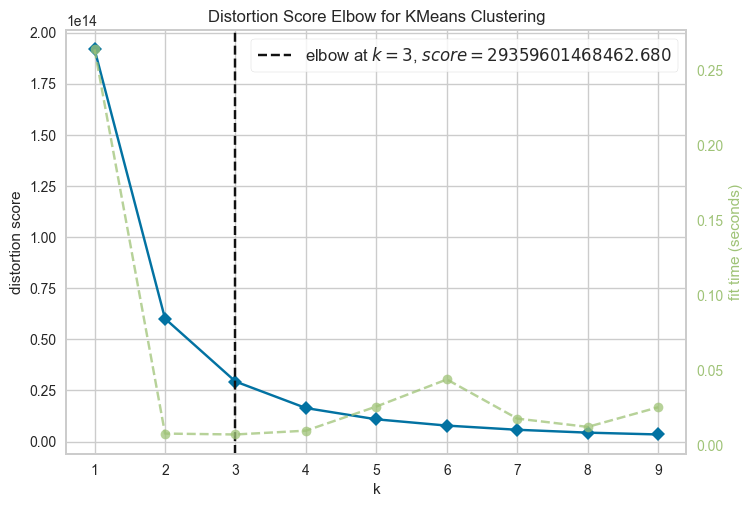

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

visulizer = KElbowVisualizer(KMeans(), k=(1,10))
visulizer.fit(x)
visulizer.show()

Model

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# kmeans
kmeans = KMeans(n_clusters= 3 , random_state= 42)
kmeans_label =kmeans.fit_predict(x)
silhouette_kmeans = silhouette_score(x,kmeans_label )

#AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_label =agglo.fit_predict(x)
silhouette_agglo = silhouette_score(x, agglo_label)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples= 3)
dbscan_label=dbscan.fit_predict(x)
if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(x, dbscan_label)
else:
    silhouette_dbscan = np.nan

# GaussianMixture
gmm = GaussianMixture(n_components=5, random_state=42)
gmm_label=gmm.fit_predict(x)
silhouette_gmm = silhouette_score(x, gmm_label)

print("silhouette score KMeans:", silhouette_kmeans)
print("silhouette score Agglomerative:", silhouette_agglo)
print("silhouette score DBSCAN:",silhouette_dbscan )
print("silhouette score GMM:", silhouette_gmm)


silhouette score KMeans: 0.5454292983900048
silhouette score Agglomerative: 0.501058206122797
silhouette score DBSCAN: nan
silhouette score GMM: 0.5377065343779646


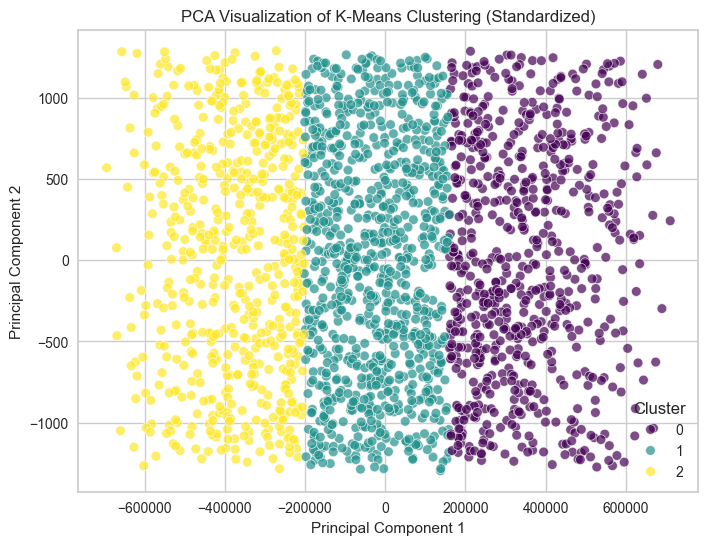

In [20]:
from sklearn.preprocessing import StandardScaler


# Lanjutkan ke PCA
pca = PCA(n_components=2)
x = pca.fit_transform(x)

# Visualisasi ulang
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=kmeans_label, palette="viridis", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of K-Means Clustering (Standardized)")
plt.legend(title="Cluster")
plt.show()


In [21]:
df_summary = df.copy()
df_summary['Cluster'] = kmeans_label

In [22]:
feature_map = {
    'Profit USD' : 'mean',
    'Distance_Traveled_nm' : 'mean',
    'Engine_Power_kW' : 'mean',
    'Cargo_Weight_tons' : 'mean',
    'Average_Load_Percentage' : 'mean',
    'Efficiency_nm_per_kWh' : 'mean',
    'Turnaround_Time_hours' : 'mean',
    'Weekly_Voyage_Count' : 'mean',
    'Efficiency_nm_per_kWh' : 'mean',
}

In [23]:
summary = df_summary.groupby('Cluster').agg(feature_map)
summary.T

Cluster,0,1,2
Profit USD,613591.958301,240092.682726,-109786.136595
Distance_Traveled_nm,1097.813085,1001.961656,1026.129424
Engine_Power_kW,1751.347073,1743.020869,1762.818215
Cargo_Weight_tons,1021.704538,1071.656558,987.918385
Average_Load_Percentage,76.002771,74.666248,74.796819
Efficiency_nm_per_kWh,0.790244,0.796631,0.778995
Turnaround_Time_hours,41.531913,41.499697,42.492713
Weekly_Voyage_Count,5.033873,4.804077,4.911504


---

In [24]:
df_summary.to_csv('Ship Performance.csv', index= False)